In [1]:
import subprocess as sp
import pandas as pd

In [2]:
out, err = sp.Popen(['pacman-history'], stdout=sp.PIPE).communicate()
out = out.decode('utf-8').strip().split('\n')
print(f'entries: {len(out)}')

entries: 3065


In [3]:
def split(xs):
    d = {'+': 0, '*': 0, '-':0}
    for l in xs:
        if ' installed ' in l:
            d['+'] += 1
        elif ' reinstalled ' in l:
            d['*'] += 1
        elif ' removed ' in l:
            d['-'] += 1
        else:
            assert(False)
    return d

data = {
    f'{k:02d}': split([l for l in out if l.startswith(f'[2019-{k:02d}') or l.startswith(f'[2020-{k:02d}')]) 
    for k in [5,6,7,8,9,10,11,12,1,2,3,4]
}

df = pd.DataFrame.from_dict(data)
df['total'] = df.sum(axis=1)
df

,05,06,07,08,09,10,11,12,01,02,03,04,total
+,312,97,85,41,31,22,119,33,118,1,162,684,1705
*,14,1,6,0,0,0,4,1,4,0,12,5,47
-,146,67,64,2,5,13,136,13,30,21,115,701,1313


In [4]:
df.transpose().apply(pd.DataFrame.describe).round(decimals=3)

,+,*,-
count,13.000,13.000,13.00
mean,262.308,7.231,202.00
std,470.189,12.794,381.69
min,1.000,0.000,2.00
25%,33.000,0.000,13.00
50%,97.000,4.000,64.00
75%,162.000,6.000,136.00
max,1705.000,47.000,1313.00


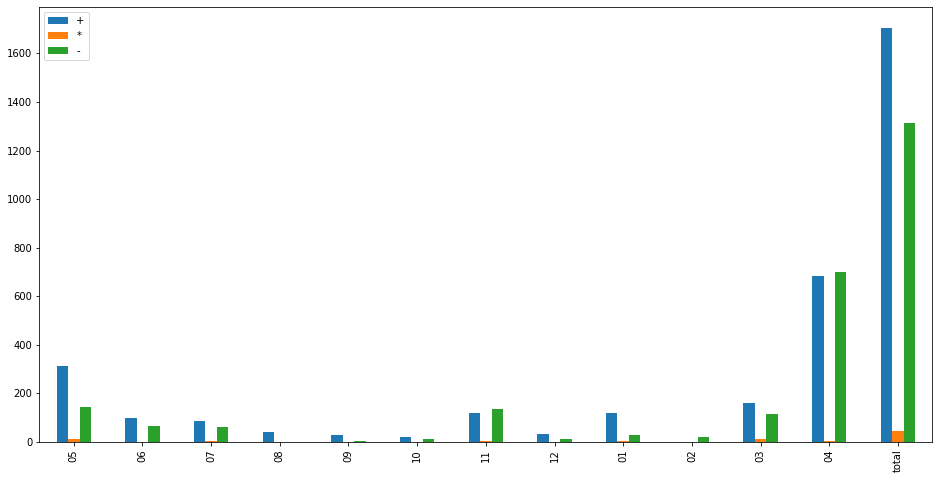

In [5]:
df.transpose().plot.bar(figsize=(16,8))